In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure, rcParams
rcParams['figure.figsize'] = (18,18)

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how='outer', on='city')

# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# split the dataframe into 3 different dataframes by Urban, Suburban, Rural
urban = combined_data[combined_data.type.str.contains('Urban',case=False)]
suburban = combined_data[combined_data.type.str.contains('Suburban',case=False)]
rural = combined_data[combined_data.type.str.contains('Rural',case=False)]

In [3]:
# Obtain the x and y coordinates for each of the three city types
# x = total number of rides per city type
urban_total_rides = urban.groupby(['city']).count()['ride_id']
urban_x_total_rides = urban_total_rides.values

suburban_total_rides = suburban.groupby(['city']).count()['ride_id']
suburban_x_total_rides = suburban_total_rides.values

rural_total_rides = rural.groupby(['city']).count()['ride_id']
rural_x_total_rides = rural_total_rides.values

# y = average fare ($) per city type
urban_average_fare = urban.groupby(['city']).mean()['fare']
urban_y_average_fare = urban_average_fare.values

suburban_average_fare = suburban.groupby(['city']).mean()['fare']
suburban_y_average_fare = suburban_average_fare.values

rural_average_fare = rural.groupby(['city']).mean()['fare']
rural_y_average_fare = rural_average_fare.values

# circle size = driver count per city
urban_driver_count = urban.groupby(['city']).count()['driver_count']
urban_s_driver_count = urban_driver_count.values

suburban_driver_count = suburban.groupby(['city']).count()['driver_count']
suburban_s_driver_count = suburban_driver_count.values

rural_driver_count = rural.groupby(['city']).count()['driver_count']
rural_s_driver_count = rural_driver_count.values

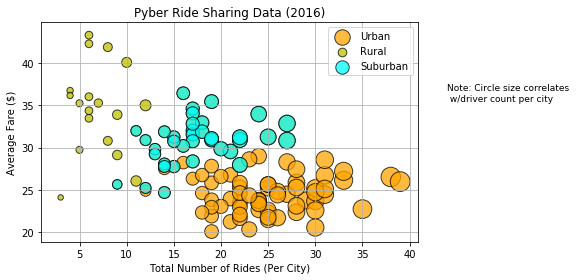

In [4]:
# Build the scatter plots for each city types with graph properties
urbanscatter = plt.scatter(urban_x_total_rides, urban_y_average_fare, s=urban_s_driver_count * 10, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)
suburbanscatter = plt.scatter(suburban_x_total_rides, suburban_y_average_fare, s=suburban_s_driver_count * 10, marker="o", facecolors="aqua", edgecolors="black", alpha=0.75)
ruralscatter = plt.scatter(rural_x_total_rides, rural_y_average_fare, s=rural_s_driver_count * 10, marker="o", facecolors="y", edgecolors="black", alpha=0.75)

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.tight_layout()

plt.legend((urbanscatter, ruralscatter, suburbanscatter), ('Urban', 'Rural', 'Suburban'))

# Incorporate a text label regarding circle size
plt.text(44, 35.5, "Note: Circle size correlates \n w/driver count per city", fontsize=9)

# Save Figure
plt.savefig('PyberRideSharingDataBubble', bbox_inches = 'tight', pad_inches = 2)

# Show plot
plt.show()

## Total Fares by City Type

In [5]:
print(urban.head())

          city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850


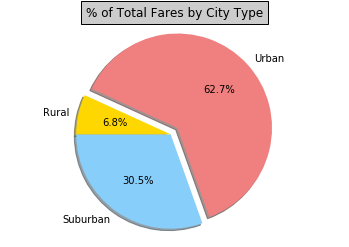

In [6]:
# Calculate Type Percents (% of total fares by city type)
total_rows = len(combined_data['type'])
total_fare_by_city = combined_data.groupby(['type']).sum()['fare']
total_fare_all = combined_data['fare'].sum()

urban_fare_percent = ((total_fare_by_city['Urban'] / total_fare_all)) * 100
suburban_fare_percent = ((total_fare_by_city['Suburban'] / total_fare_all)) * 100
rural_fare_percent = ((total_fare_by_city['Rural'] / total_fare_all )) * 100
 
# Build Pie Chart
labels = 'Suburban', 'Urban', 'Rural'
sizes = [suburban_fare_percent, urban_fare_percent, rural_fare_percent]
explode = (0, 0.1, 0)  
cols = ['lightskyblue', 'lightcoral', 'gold']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=cols, labels=labels, autopct='%1.1f%%',shadow=True, startangle=180)

# chart title
plt.title("% of Total Fares by City Type", bbox={'facecolor':'0.8', 'pad':5})

# Equal aspect ratio ensures the pie is d
ax1.axis('equal') 


# Save Figure
plt.savefig('PercentTotalFaresbyCityType', bbox_inches = 'tight', pad_inches = 2)


# Show Figure
plt.show()

## Total Rides by City Type

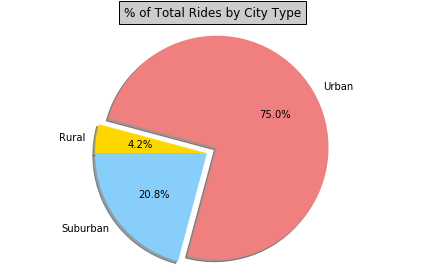

In [7]:
# Calculate Ride Percents
urban_total_rides_count = urban_total_rides.sum()
suburban_total_rides_count = suburban_total_rides.sum()
rural_total_rides_count = rural_total_rides.sum()

all_rides_total = urban_total_rides_count + suburban_total_rides_count + rural_total_rides_count

percent_urban_rides = urban_total_rides_count/all_rides_total * 100
percent_suburban_rides = suburban_total_rides_count/all_rides_total * 100
percent_rural_rides = rural_total_rides_count/all_rides_total * 100

# Build Pie Chart
labels = ['Suburban', 'Urban', 'Rural']
sizes = [percent_suburban_rides, percent_urban_rides, percent_rural_rides]
explode = (0, 0.1, 0) 
colors = ['lightskyblue', 'lightcoral', 'gold']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=180)


# chart title
plt.title("% of Total Rides by City Type", bbox={'facecolor':'0.8', 'pad':5})

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()


# Save Figure
plt.savefig('PercentTotalRidesbyCityType', bbox_inches = 'tight', pad_inches = 2)

# display chart
plt.show()




In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

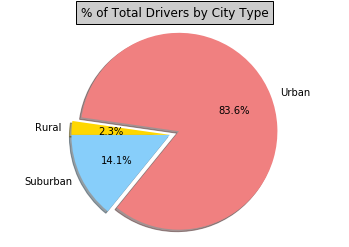

In [9]:
# Calculate Ride Percents

# 1st get the unique only sums per city
urban_df = pd.DataFrame(urban,columns=['city','driver_count'])
urban_df = urban_df.drop_duplicates()
total_urban_drivers = urban_df['driver_count'].sum()

rural_df = pd.DataFrame(rural,columns=['city','driver_count'])
rural_df = rural_df.drop_duplicates()
total_rural_drivers = rural_df['driver_count'].sum()

suburban_df = pd.DataFrame(suburban,columns=['city','driver_count'])
suburban_df = suburban_df.drop_duplicates()
total_suburban_drivers = suburban_df['driver_count'].sum()

# driver percentages calculation
all_drivers = total_urban_drivers + total_rural_drivers + total_suburban_drivers
percent_urban_drivers = total_urban_drivers/all_drivers * 100
percent_rural_drivers = total_rural_drivers/all_drivers * 100
percent_suburban_drivers = total_suburban_drivers/all_drivers * 100


# Build Pie Chart
labels = ['Suburban', 'Urban', 'Rural']
sizes = [percent_suburban_drivers, percent_urban_drivers, percent_rural_drivers]
explode = (0, 0.1, 0) 
colors = ['lightskyblue', 'lightcoral', 'gold']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=180)


# chart title
plt.title("% of Total Drivers by City Type", bbox={'facecolor':'0.8', 'pad':5})

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  


# Save Figure
plt.savefig('PercentTotalDriversbyCityType', bbox_inches = 'tight', pad_inches = 2)


# Show Pie Chart
plt.show()
